In [6]:
from Cluster_Evaluation_Utils import *
from sys import exit

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

rcParams = {'font.size': 30 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))


In [2]:
mode_centroid = '/Users/harihara/Mount-2/projects/SCRAPT/Experiments/Lupus_Microbiome_MT/\
Adaptive_With_Modeshifting/sim_0.98/alpha_0.1/'
length_centroid = '/Users/harihara/Mount/Iterative_Clustering/Centroid_Length/'

In [3]:
df_mode_clusters, df_mode_summary = Compile_Cluster_Summaries(mode_centroid)
cluster_list = df_mode_clusters['Density'].tolist()
x_mode,y_mode=Compute_Fragmentation_Measure(cluster_list)

In [4]:
df_length_clusters, df_length_summary = Compile_Cluster_Summaries(length_centroid)
cluster_list = df_length_clusters['Density'].tolist()
x_length,y_length=Compute_Fragmentation_Measure(cluster_list)

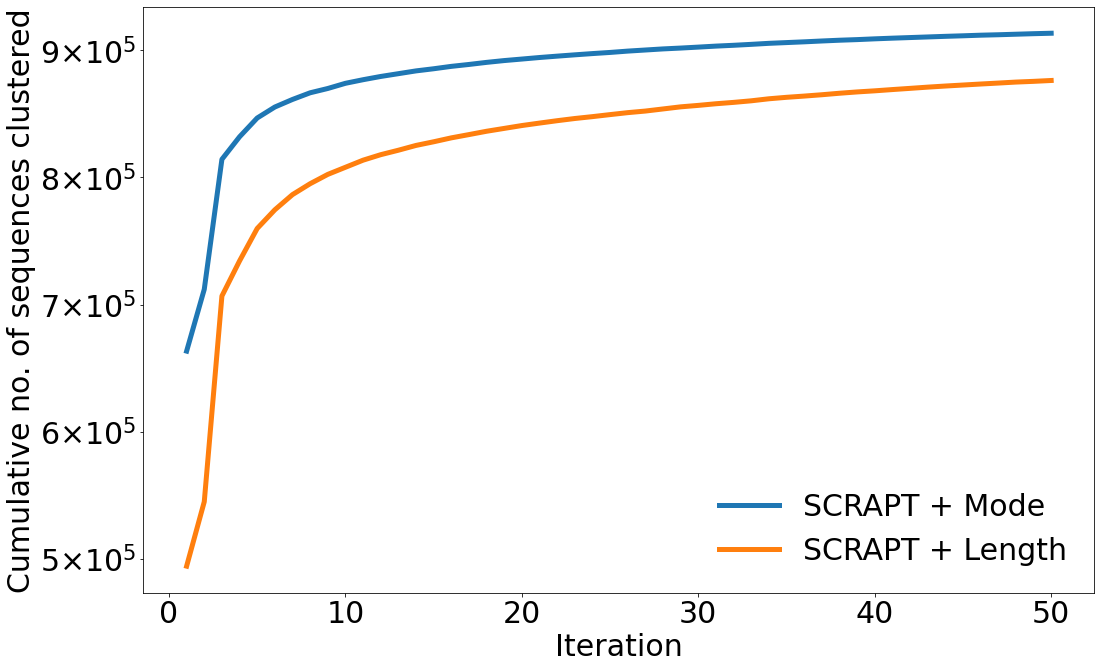

In [12]:
fig,ax = plt.subplots(1,1, figsize = (16,10))
ax.plot(np.cumsum(df_mode_summary['Seq_Counts']), linewidth = 5, label = 'SCRAPT + Mode')
ax.plot(np.cumsum(df_length_summary['Seq_Counts']), linewidth = 5, label = 'SCRAPT + Length')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cumulative no. of sequences clustered')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.legend()
ax.legend(loc=4, frameon = False)
fig.tight_layout()

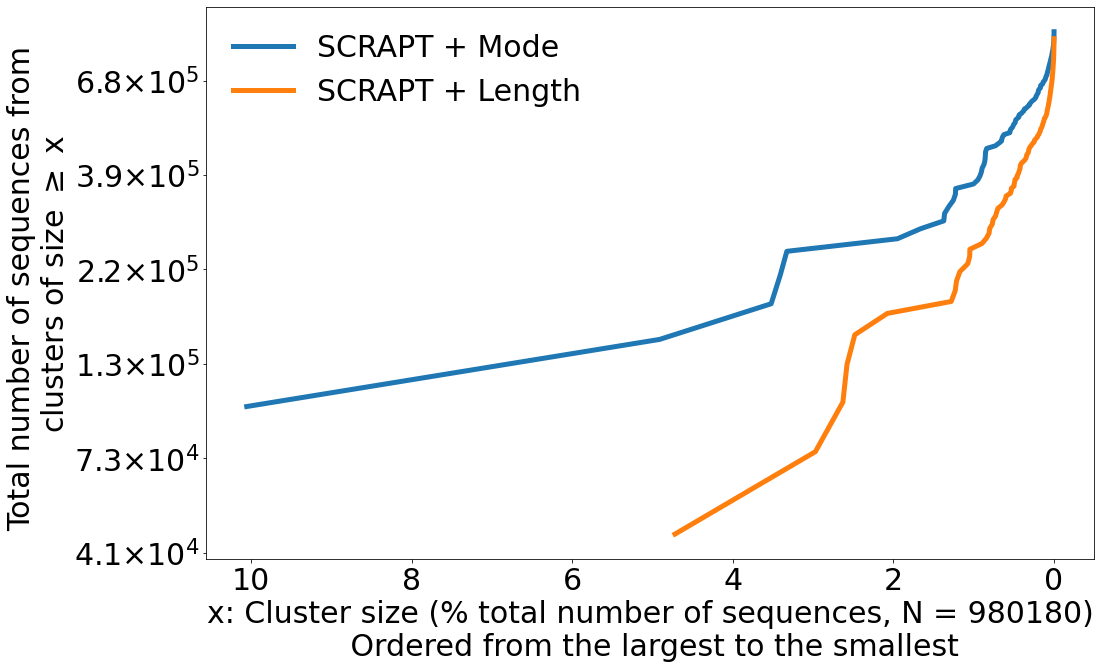

In [15]:
n = 980180
fig,ax = plt.subplots(1,1,figsize = (16,10))
ax.plot(np.array(y_mode)/n*100.0,x_mode, linewidth=5, label = 'SCRAPT + Mode')
ax.plot(np.array(y_length)/n*100.0,x_length, linewidth=5, label = 'SCRAPT + Length')

ax.set_yscale('log', base = 1.75)
ax.set_xlim(ax.get_xlim()[::-1])
ylim = ax.get_ylim()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.legend(loc=2, frameon = False)
ax.set_ylabel('Total number of sequences from \n'+r'clusters of size $\geq$ x')
ax.set_xlabel('x: Cluster size (% total number of sequences, N = '+str(n)+
              ')\n Ordered from the largest to the smallest')
fig.tight_layout()